# Trabajo Práctico 1  
 
####Grupo 1:


| Nombre  | Padrón |
| ------------- | ------------- |
| Alvarez Ernesto Severino | 102221  |
| Feijóo Sofía  | 101148  |
| Milhas Facundo  | 102727 |
| Reinaudo Dante  | 102848  |


####Tema 1:
- Generador de números al azar asignado: **Mersenne Twister**






# Ejercicio 1 - Algoritmo

Sobre el generador de números al azar propuesto en el paper asignado, se pide:
* Implementarlo en función de lo especificado en el documento.
* Modificarlo (si aplica) para obtener números al azar entre 0 y 1
* Realizar los gráficos que se consideren adecuados para mostrar las distribuciones de números al azar
generados en ambos casos (explicar que se busca interpretar con cada uno)

## Implementación

Lo primero que hay que definir son las constantes, estas tienen que ser numeros especificos que en su conjunto cumplen con una serie de propiedades. Utilizaremos las constantes del MT19937 para esta prueba, que genera con un rango entre 0 y 2^32 numeros pseudo-aleatorios.

In [ ]:
n = 624
m = 397
r = 31
f = 1812433253
a = 0x9908B0DF
w = 32
u = 11
s = 7
b = 0x9D2C5680
t = 15
c = 0xEFC60000
l = 18
d = 0xFFFFFFFF
w_mask = pow(2, w) - 1

In [ ]:
import sys
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
MT = [0 for i in range(n)]
index = n + 1
lower_mask = (1 << r) - 1
upper_mask = (~lower_mask) & w_mask

Generamos la ***palabra*** (MT) que se utiliza de *semilla* para el generador

In [ ]:
# Seed
def set_seed(seed):
  global index
  global MT
  index = n
  MT[0] = seed
  for i in range(1, n):
    MT[i] = (f * (MT[i - 1] ^ (MT[i - 1] >> (w - 2))) + i) & w_mask

set_seed(0)


Cada vez que llamamos a la funcion *twist* estamos generando los siguiente n valores de la serie X_i

In [ ]:
def twist():
  global index
  global MT
  for i in range(n):
    x = (MT[i] & upper_mask) | (MT[(i + 1) % n] & lower_mask) 
    xA = x >> 1
    if x % 2 != 0:
      xA = xA^a  
    MT[i] = MT[(i + m) % n]^xA
  index = 0

Y por último el generador de numeros aleatorios que utiliza la posicion del *indice actual* en la palabra MT para generar el número

In [ ]:

def random_number():
  global index
  global MT
  if index == n: twist()
  y = MT[index]
  y = y ^ ((y >> u) & d)
  y = y ^ ((y << s) & b)
  y = y ^ ((y << t) & c)
  y = y ^ (y >> l)

  index += 1
  return y & w_mask


random_number()


2357136044

Genera numeros entre 0 y 2^w - 1. 

## Probando el generador

In [ ]:
from matplotlib import pyplot as plt

Primero probamos una generación de 2^10 (1024) numeros al azar.

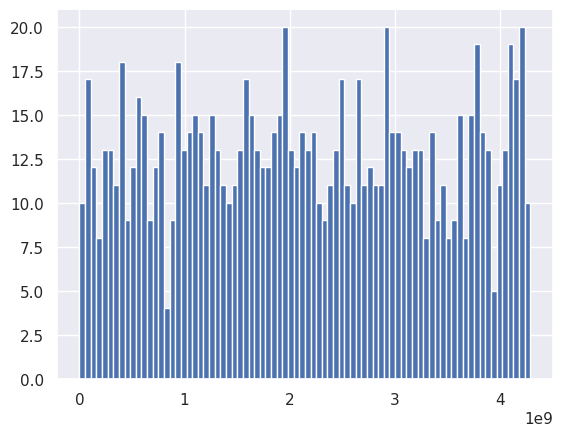

In [ ]:
resultado = [random_number() for i in range(pow(2, 10))]

plt.hist(resultado, 80)

plt.show()

Y vemos que no pareciera ser muy equiproblable la generación, aunque si se prueba varias veces con distintas semillas el histograma muta sus picos y valles

 La apariencia de la gráfica sugiere que los números generados se distribuyen de manera uniforme y aleatoria, lo que es un buen indicador de que el algoritmo está funcionando correctamente.
 
 El eje x muestra el índice del número generado y el eje y muestra el valor del número generado. Parece haber una gran cantidad de valores pequeños generados, pero también hay valores más grandes que están bien distribuidos. Además, no parece haber patrones discernibles en los números generados, lo que indica que el algoritmo es altamente aleatorio y no está sesgado hacia ningún conjunto particular de números.

En general, la distribución uniforme de los números generados sugiere que el Mersenne Twister es un algoritmo sólido y fiable para generar números pseudoaleatorios.

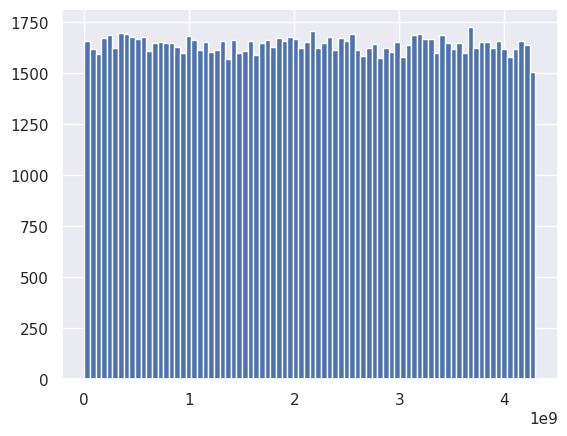

In [ ]:
resultado = [random_number() for i in range(pow(2, 17))]
plt.hist(resultado, 80)

plt.show()

Observamos que a medida que generamos mayores cantidades de valores pseudoaleatorios, la distribución tiende a ser equiprobable

## Hacerlo entre 0 y 1

Ahora lo que nos falta es que el rango del generador sea entre 0 y 1. Esto es sencillo, ya que genera, inicialmente, numeros entre 0 y 2^w (2^32 por estar utilizando MT19937). Lo único que hace falta entonces es dividir el numero generado por 2^w y eso hace que el generador se reduzca al universo de numeros entre 0 y 1


In [ ]:

def generador_01():
  return random_number() / (pow(2, w) - 1)


In [ ]:
resultado = [generador_01() for i in range(pow(2, 17))]

In [ ]:
resultado = [generador_01() for i in range(pow(2, 10))]

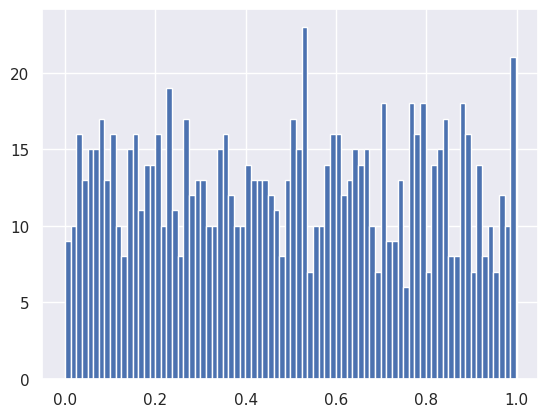

In [ ]:
plt.hist(resultado, 80)

plt.show()

In [ ]:
sum(resultado) / len(resultado)

0.4930176026211602

Con esta última cuenta corroboramos que la media sea aproximadamente 0.5, que es la que tiene una distribución equiprobable entre 0 y 1

# Ejercicio 2 - Tests
Para los generadores implementados en el ejercicio 1:
* Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
* Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.

Antes de comenzar con los tests, separamos muestras de distintos tamaños de números generados por nuestra implementación del generador. A partir estas muestras trabajaremos con los tests.

La primera muestra solo tendrá 32 elementos, la segunda 128 y la tercera 1024.

In [ ]:
muestra1 = [generador_01() for i in range(pow(2, 5))]
muestra2 = [generador_01() for i in range(pow(2, 7))]
muestra3 = [generador_01() for i in range(pow(2, 10))]

## Test espectral

El primer test que realizaremos es de tipo espectral. Con las tres muestras generadas generamos un scatter plot para verificar que no se forman patrones dentro en el gráfico, que indicarían que los datos de la muestra están relacionados (y por ende no son totalmente random).

Para realizar el gráfico se toman todos los números de la muestra de a pares.  

In [ ]:
def scatter_plot(muestra):
  length = len(muestra)
  n_obs = muestra[:length - 1]
  n_plus_1_obs = muestra[1:length]

  sns_scat=sns.scatterplot(x=n_obs, y=n_plus_1_obs).set(xlabel='n observaciones', ylabel='n+1 observaciones')    
  plt.title('Test espectral - Distribución uniforme')
  plt.show()

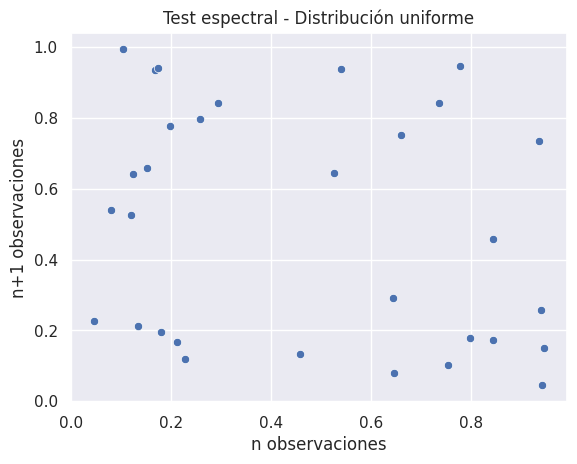

In [ ]:
scatter_plot(muestra1)

Para la primera muestra, la más pequeña, pareciera darnos un primer indicio de que los pares de números generados no siguen ningún patrón. 

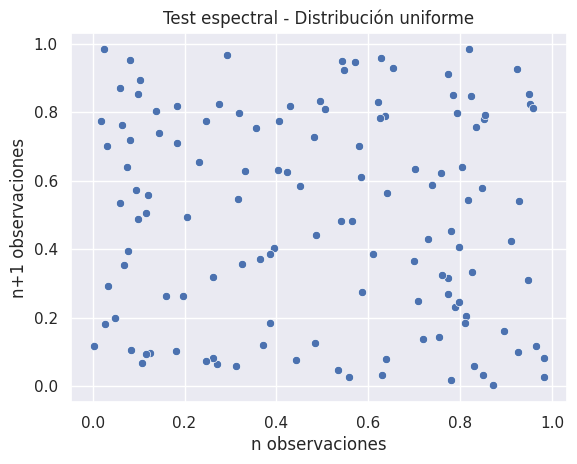

In [ ]:
scatter_plot(muestra2)

Con la segunda muestra, de mayor tamaño, observamos lo mismo: una nube de puntos.

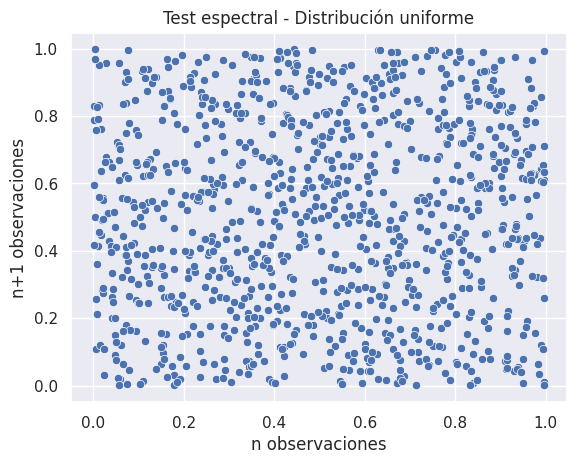

In [ ]:
scatter_plot(muestra3)

Ya viendo la tercer muestra podemos estar más cerca de afirmar que los puntos están distribuidos en el espacio uniformemente. 

También podemos hacer un gráfico en 3 dimensiones armando ternas entre los puntos de la muestra para asegurarnos de que agregando otra dimensión siga sin haber una patrón observable entre los números que pueda implicar una relación entre ellos.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def scatter_plot_3d(muestra):
  length = len(muestra)
  x = muestra[:length - 2]
  y = muestra[1:length - 1]
  z = muestra[2:length]

  ax = plt.subplot(111, projection='3d')
  ax.scatter(x, y, z, s=0.5)
  plt.title('Test espectral - Distribución uniforme')
  plt.show()

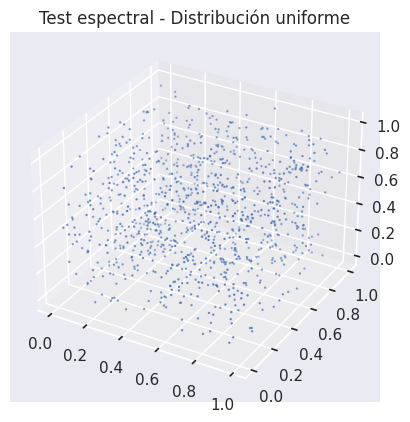

In [ ]:
scatter_plot_3d(muestra3)

Los resultados en 3 dimensiones son los mismos que los hayados en 2 dimensiones. 

## Test Kolmogorov-Smirnov

In [ ]:
from scipy.stats import kstest

El test de Kolmogorov-Smirnov analiza cuan alejada está una función de probabilidad de otra.

Con un nivel de significancia a = 0,05 vamos a comparar la probabilidad acumulada de una distribución uniforme contra la generada. La hipótesis nula será justamente que la probabilidad acumulada de la muestra se distribuye de manera uniforme. 

In [ ]:
def kolmogorov_smirnov(muestra):
    estadistico, pvalue = kstest(muestra, 'uniform')
    print("Estadistico = %f, p-value = %f" % (estadistico, pvalue))

    if pvalue < 0.05:
        print("Se rechaza la hipótesis nula")
    else:
        print("Se acepta la hipótesis nula")

In [ ]:
def plot_ks(muestra):
    plt.figure()
    sns.ecdfplot(data=muestra, label='Uniforme')
    uniform_data = np.linspace(0,1,len(muestra))
    plt.plot(np.sort(uniform_data), np.linspace(0, 1, len(uniform_data), endpoint=False), color='r', label='Empírica')

    plt.legend(title="Funciones")
    plt.ylabel("F(x)")
    plt.xlabel("x")
    plt.show()

Entonces aplicamos el test a las 3 muestras de números que tenemos. También graficamos la función de distribución acumulada de una uniforme en (0,1) vs la distribución acumulada empirica que se está analizando. 
Esperamos aceptar la hipótesis nula y observar un gráfico donde la distancia entre la función de distribución de empírica se encuentra a poca distancia de la función uniforme. Idealmente se debería formar una única línea (la roja y la azul superpuestas), lo que significaría que ambas distribuciones son idénticas.

Estadistico = 0.181148, p-value = 0.216461
Se acepta la hipótesis nula


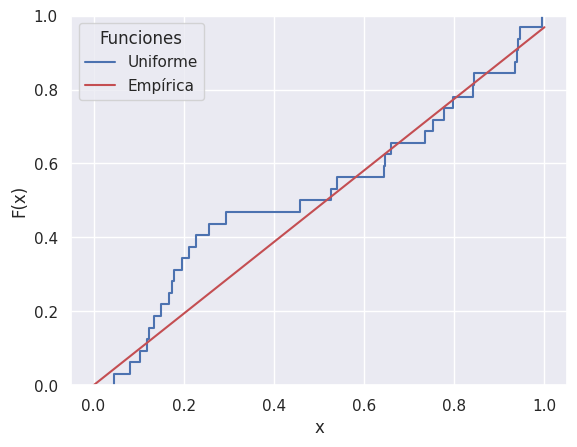

In [ ]:
kolmogorov_smirnov(muestra1)
plot_ks(muestra1)

Estadistico = 0.070014, p-value = 0.533810
Se acepta la hipótesis nula


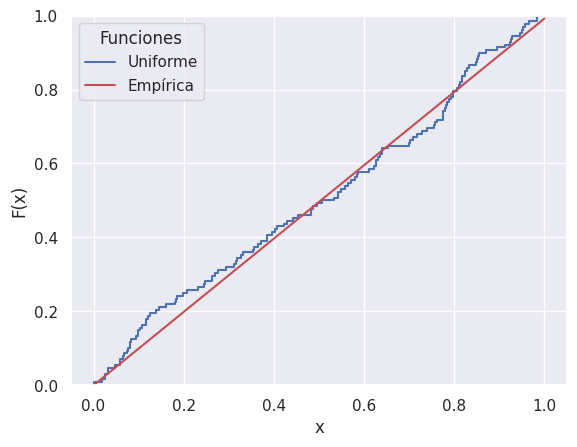

In [ ]:
kolmogorov_smirnov(muestra2)
plot_ks(muestra2)

Estadistico = 0.017770, p-value = 0.897026
Se acepta la hipótesis nula


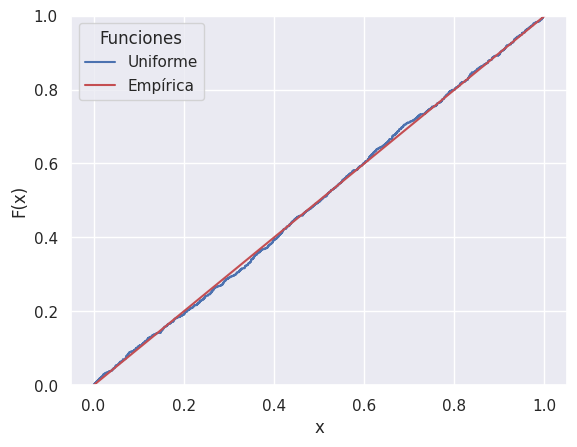

In [ ]:
kolmogorov_smirnov(muestra3)
plot_ks(muestra3)

Podemos observar que para todos los tamaños de muestra se acepta la hipótesis nula. En particular, a medida que el tamaño de la muestra crece podemos ver cómo tiende a comportarse como una uniforme, ya que vemos como decrece la distancia entre ambas funciones en el gráfico.


## Test QQ Plot

In [ ]:
import statsmodels.api as sm
from scipy.stats import distributions

Por último realizamos un test QQ plot, que grafica contrastes entre cuantiles. Para esto generamos un gráfico en el cual un eje es la muestra a analizar y el otro es la variable distribuida de manera uniforme, ya que espero que mis muestras sigan esa distribución.

El resultado esperado es que los puntos del gráfico se encuentren sobre la recta roja, que representa la distribución teórica de los puntos.

In [ ]:
def plot_qq(muestra):
    sm.qqplot(data=np.array(muestra), dist=distributions.uniform, line ='45')
    
    plt.title('QQ Plot')
    plt.show()

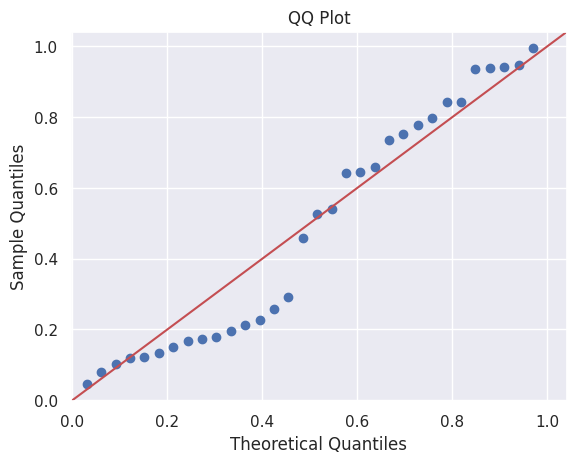

In [ ]:
plot_qq(muestra1)

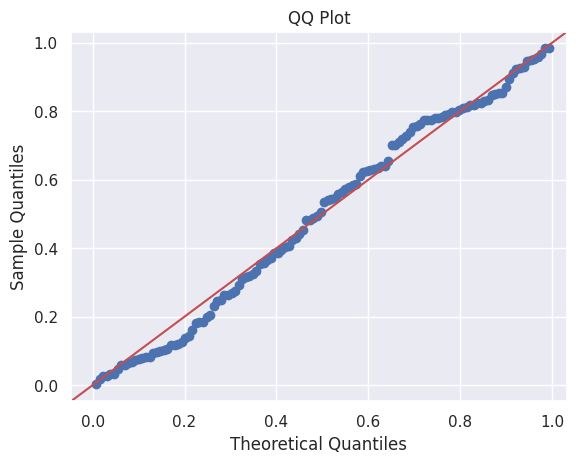

In [ ]:
plot_qq(muestra2)

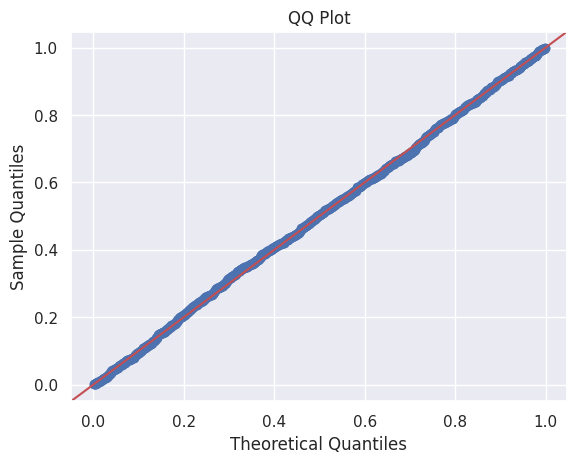

In [ ]:
plot_qq(muestra3)

Podemos observar que a medida que crece el tamaño de la muestra, la distribución empírica se asemeja cada vez más a la uniforme. 

# Ejercicio 3

Utilizando el generador implementado en el ejercicio 1:
* Implementar un método para generar variables aleatorias con distribución Normal con media 10, y desvío estándar 2.
* Graficar la distribución que siguen los números pseudoaleatorios generados.
* Realizar, al menos 2 tests, de los explicados en la materia, para verificar si los números generados siguen la distribución pedida (evalue los resultados para distintos tamaños de muestra).

## Método de superposición



El método de superposición se basa en que ciertas variables aleatorias puedan escribirse como la suma de otras variables aleatorias independientes.

Para generar variables aleatorias con distribución normal con esperanza (o media) 10 y varianza 4 (o desvío estándar 2) podemos superponer variables con distribución uniforme entre dos puntos a y b. 

Sabemos que la esperanza de una variable uniforme entre a y b es 

𝐸(x) = (a + b) / 2

y la varianza es

𝑉(x) = (b - a)^2 /12

También sabemos que multiplicando dichas ecuaciones por n obtendríamos la esperanza y varianza de la sumatoria de n variables con distribución uniforme. 

Entonces definiendo un n y sabiendo los valores de la esperanza y varianza deseados, podemos obtener a y b. Definimos n = 10 y, haciendo los cálculos pertinentes encontramos que 

a = -0.09 

b = 2.18 

Ahora sabiendo que vamos a superponer variables U(-0.09, 2.18), hay que llevar a nuestro generador que es U(0,1) a esa forma. Vamos a generar muestras de números que se obtuvieron acumulando en una variable 10 números generados aleatoriamente con nuestra implementación del mersenne twister (llevados del rango 0 a 1 al rango -0.09 a 2.18). 

Y luego para analizar los números obtenidos vamos a graficar histogramas de las muestras.

In [ ]:
def generate_x(n):
    x=0
    for i in range(n):
        x += (generador_01()*2.18 - 0.09) # para pasar de generar (0,1) a generar (a, b)
    return x

def plot(data):
  sns.histplot(data=data,bins=50)
  plt.title('Simulación de una variable con distribución normal\n', size=16)
  plt.ylabel("Ocurrencias")
  plt.xlabel("Valores generados")
  plt.plot()

Para una muestra de 1000 números:

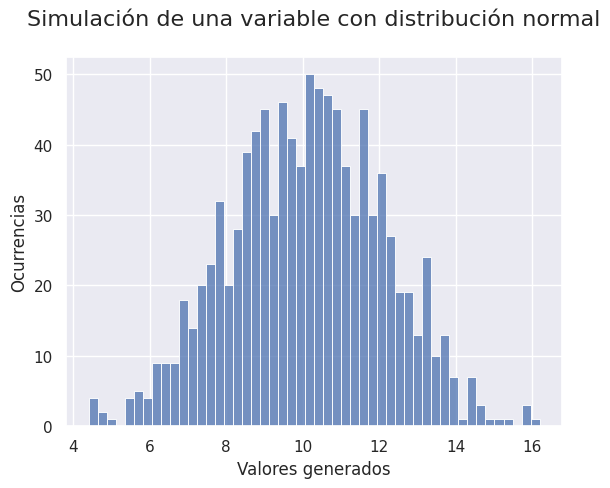

In [ ]:
plot([generate_x(10) for i in range(1000)])

Observamos en el histograma que los valores generados se encuentran entre 4 y 16 aproximadamente, y que la distribución de los valores está más concentrada entre el 8 y 12. Es decir, pareciera ser que se generan más números que se cuentran en el rango entre 8 y 12.
Si lo comparamos con el histograma de una muestra generada a partir de una distribución normal, vemos que la tendencia es la misma:


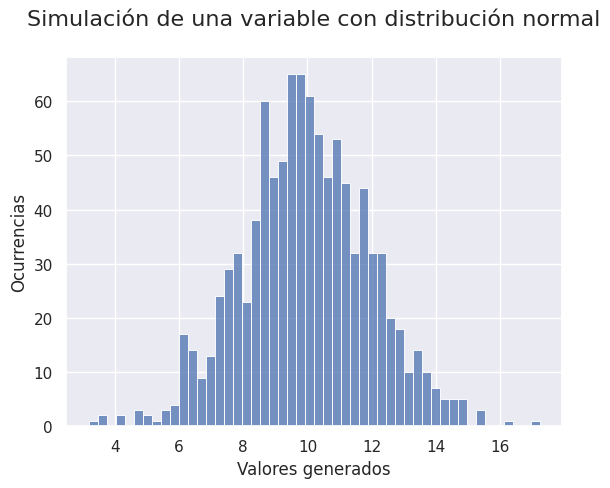

In [ ]:
plot(np.random.normal(10, 2, 1000))

Ahora analizamos qué sucede con una muestra de mayor tamaño. Para n = 10000

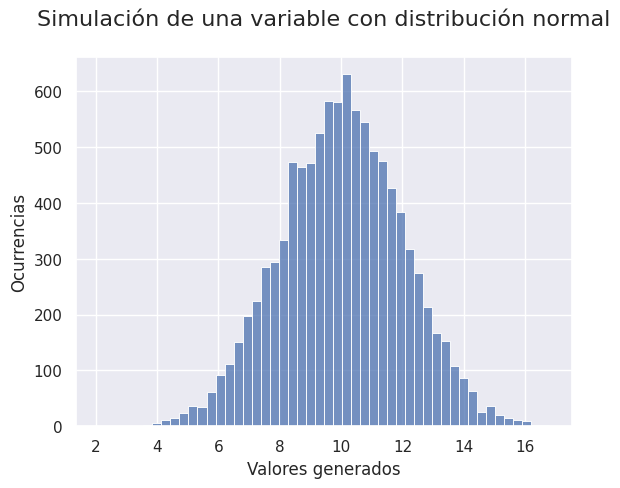

In [ ]:
plot([generate_x(10) for i in range(10000)])

Vemos que si generamos una mayor cantidad de números, pareciera ser que crece la tendencia a que los valores se encuentren en un rango entre 9 y 11, lo cual es esperable si buscamos tener una media de 10. 

## Tests

### Shapiro

Como primer test vamos a usar Shapiro-Wilk, test no paramétrico para determinar normalidad. La hipótesis nula será que la muestra sigue una distribución normal. 

In [ ]:
from scipy.stats import shapiro

Vamos a comparar los resultados del test para una muestra de tamaño 1000 con los resultados de una muestra generada a partir de una distribución normal. 

In [ ]:
nros_rand_normal = [generate_x(10) for i in range(1000)]

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribución normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 9.996978
La varianza es aproximadamente 4.023547


In [ ]:
nros_rand_normal = np.random.normal(10, 2, 1000)

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribución normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 10.054032
La varianza es aproximadamente 3.954972


Podemos ver en primer lugar que en ambos casos la hipótesis de que se tienen una distribución normal no puede ser rechazada, lo cual se condice con lo esperado, y en segundo lugar que la media y la varianza obtenidas también se acercan mucho a los valores a los cuales quisimos llegar inicialmente (que eran 10 y 4 respectivamente).

Ahora vamos a probar con una muestra de mayor tamaño. Para n = 10000

In [ ]:
nros_rand_normal = [generate_x(10) for i in range(10000)]

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribución normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

Se rechaza la H0, que sigue una distribución normal
La media es aproximadamente 9.992537
La varianza es aproximadamente 3.999484


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
nros_rand_normal = np.random.normal(10, 2, 10000)

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribución normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 9.978037
La varianza es aproximadamente 4.012042


Vemos nuevamente que en ambos casos (muestra aleatoria con nuestro generador y muestra uniforme) los resultados son los esperados: se obtienen media y varianza de aproximadamente 10 y 4 respectivamente, y la hipótesis nula no puede ser rechazada. 

### Kolmogorov Smirnov

In [ ]:
from scipy.stats import kstest
import math

datos_sinteticos = np.random.normal(10,2,1000)
nros_rand_normal = [generate_x(10) for i in range(1000)]

statistic_ks, pvalue_ks= kstest(datos_sinteticos, nros_rand_normal)

print("stat: %f \n pvalue: %f" % (statistic_ks, pvalue_ks))

if pvalue_ks < 0.05:
    print("Se rechaza la hipótesis nula")
else:
    print("Se acepta la hipótesis nula")

stat: 0.034000 
 pvalue: 0.610166
Se acepta la hipótesis nula


#Ejercicio 4 - Kmeans

Los números pseudo aleatorios son ampliamente utilizados en algoritmos de Machine Learning.
En este ejercicio se pide, utilizando el generador desarrollado en el primer ejercicio implementar el algoritmo
KMeans, y aplicarlo al dataset entregado junto a este trabajo práctico.
Pasos del algoritmo:


1. Determinar la cantidad de cluster/grupos a utilizar. Para este caso utilizar 3.
2. Elegir los centroides a utilizar en cada grupo. Estos centroides se inicializan en coordenadas aleatorias.
3. Calcular la distancia de cada punto a cada centroide. Utilizar distancia euclídea. Agrupar cada observación con
aquel centroide más próximo
4. Recalcular los centroides de cada grupo como la media de todos los puntos del cluster. Esto significa que se
actualiza la posición del centroide para reflejar la nueva agrupación.
5. Repetir los pasos 3 y 4 hasta que alguno de los criterios de stop se cumplan:

* Los centroides dejan de cambiar. Después de múltiples iteraciones, los centroides de cada clúster no cambian. Por lo que se asume que el algoritmo ha convergido.

* Los puntos dejan de cambiar de clúster. Cuando se observa que no hay un intercambio de clústers se
asume que el modelo está entrenado.
* Límite de iteraciones. Se fija un número máximo de iteraciones que queremos que nuestro algoritmo
ejecute antes de pararlo. Cuando llega a ese número se detiene el entrenamiento.

Evaluar el comportamiento del algoritmo utilizando distintos centroides iniciales (utilizando distintos números al
azar generados).
Grafique cada observación y los grupos generados.

##Observacion del Dataset

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Leo el archivo csv
def get_dataset():
  return pd.read_csv("/content/sample_data/dataset_kmeans_tema1.csv", header=None, names=['x', 'y'])
  
dataset = get_dataset()
dataset


,x,y
0,0.844637,1.483692
1,0.256773,-0.193590
2,0.921085,1.657488
3,-0.739796,-0.128695
4,0.239571,1.370132
...,...,...
9995,0.977775,-1.502248
9996,1.100656,1.478022
9997,0.173089,-0.477702
9998,0.695110,1.263414


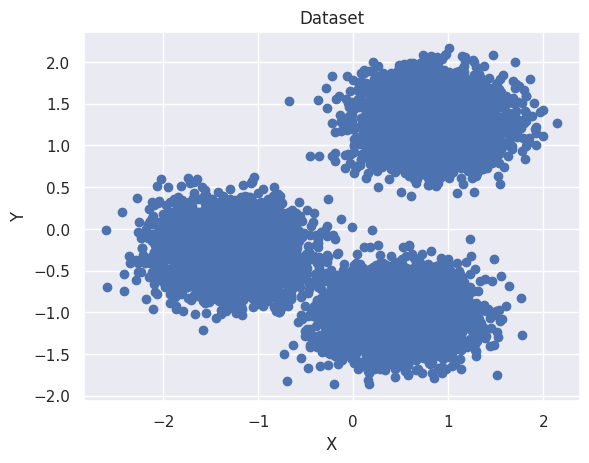

In [ ]:
# plot the dataset
plt.scatter(dataset['x'], dataset['y'])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Observando el gráfico, es posible asumir que el mismo sugiere que las dos variables pueden estar relacionadas de alguna manera.

Parece haber algun tipo de correlación positiva entre los valores de x e y: Cuando aumentan los valores de x, también lo hacen los valores de y.

A simple vista, se logran apreciar tres grupos grandes de puntos de datos agrupados en clusters, con algunos valores atípicos dispersos.

Los valores de x e y parecen estar acotados, con la mayoría de los puntos de datos dentro de un cierto rango.

Según estas observaciones, es posible que los datos representen algún tipo de medición o experimento en el que se comparan dos variables. El gran grupo de puntos de datos y el rango acotado sugieren que puede haber algún tipo de límite o restricción en los valores que se miden.

In [ ]:
#Obtengo el rango de coordenadas del dataset... 
max_x = dataset['x'].max()
min_x = dataset['x'].min()

max_y = dataset['y'].max()
min_y = dataset['y'].min()


# Imprimo los valores máximos de cada columna
print("El valor máximo en la columna 'x' es:", max_x)
print("El valor mínimo en la columna 'x' es:", min_x)

print("El valor máximo en la columna 'y' es:", max_y)
print("El valor mínimo en la columna 'y' es:", min_y)

El valor máximo en la columna 'x' es: 2.146191799005762
El valor mínimo en la columna 'x' es: -2.600406140530271
El valor máximo en la columna 'y' es: 2.1636166365073644
El valor mínimo en la columna 'y' es: -1.8652716871113888


##Implementacion del Algoritmo KMeans

###Generación de los centroides iniciales

El enunciado aclara que "los centroides se inicializan en coordenadas aleatorias" utilizando el generador desarrollado en el primer ejercicio (Merssene Twister) al implementar el algoritmo KMeans.

La funcion Sample de Pandas devuelve una muestra aleatoria de elementos del dataset que se le provee, al brindarle una semilla generada por el generador de números aleatorios del ejercicio 1.

Esta "semilla aleatoria" es un número inicial utilizado para generar secuencias de números aleatorios (en este caso la eleccion de los centroides) y es importante para asegurar la aleatoriedad y la reproducibilidad en aplicaciones de aprendizaje automático como lo es Kmeans.

In [ ]:

seed = random_number()

#Inicializo los centroides aleatoriamente. n es la cantidad de muestras (coordeandas, centroides) a devolver.
#Esta cantidad de centroides a generar es la misma que la cantidad de clusters a encontrar.

centroides = dataset.sample(n=3, random_state=seed)

###Ejecucion

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clusters KMeans')

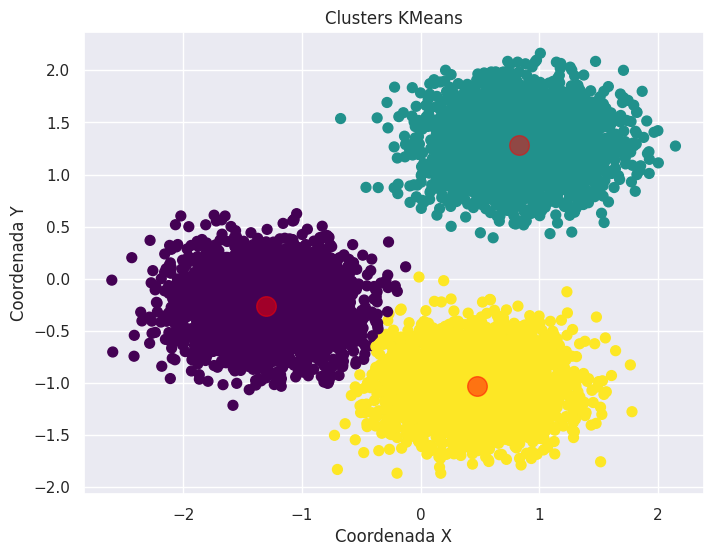

In [ ]:
#Ejecuto el algoritmo KMeans
#KMeans conoce la generación de números aleatorios para la inicialización de los centroides.
#aleatoriedad determinista para que tenga reproducibilidad(?
kmeans = KMeans(n_clusters=3, init=centroides, max_iter=100)

#kmeans.fit(dataset[['x', 'y']])
kmeans.fit(dataset)

# Centroides finales
centroides_finales = kmeans.cluster_centers_

# #Etiquetas de los clusters
labels = kmeans.labels_

# #y_kmeans = kmeans.predict(dataset)
fig, ax = plt.subplots(figsize=(8, 6))

# # Grafica los puntos del dataset
ax.scatter(dataset['x'], dataset['y'], c=labels, s=50, cmap='viridis')

# # Grafica los centroides
ax.scatter(centroides_finales[:, 0], centroides_finales[:, 1], c='red', s=200, alpha=0.5)


# # Configura los ejes y los títulos
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Clusters KMeans')


El gráfico muestra el resultado del algoritmo de K-Means con 3 clusters y 3 centroides iniciales aleatorios en 100 iteraciones.

Cada color indica el cluster al que fue asignado cada dato del dataset. Los centroides finales quedan indicados en rojo.

En el gráfico se pueden observar los tres clusters de los que hablamos antes, bien identificados por el algoritmo. Cada cluster está compuesto por puntos del dataset que están más cercanos entre sí. Los centroides finales se encuentran en el centro de los puntos asignados a ese cluster.

Podemos decir que el algoritmo de K-Means parece haber separado adecuadamente los datos en tres clusters. 

De todas formas, los centroides iniciales aleatorios pueden haber afectado la posición final de los centroides finales en los clusters.

###Evaluación del Algoritmo
Evaluar el comportamiento utilizando distintos centroides iniciales (utilizando distintos números al azar generados).

In [ ]:
#Definicion de funciones para su evaluacion
cant_clusters = 3
cant_iteraciones = 100
def correr_kmeans(seed):
    # Inicializa los centroides aleatoriamente
    centroides = dataset.sample(n=cant_clusters, random_state=seed)

    # Ejecuta el algoritmo KMeans
    kmeans = KMeans(n_clusters=cant_clusters, init=centroides, max_iter=cant_iteraciones)
                    #, random_state=seed)
    kmeans.fit(dataset[['x', 'y']])

    # Retorna los centroides finales y las etiquetas de los clusters
    return kmeans.cluster_centers_, kmeans.labels_

def plot_clusters(centroides, labels):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Grafica los puntos del dataset
    ax.scatter(dataset['x'], dataset['y'], c=labels, s=50, cmap='viridis')

    # Grafica los centroides
    ax.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)

    # Configura los ejes y los títulos
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_title('Clusters KMeans')

Semilla obtenida: 2610097493


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


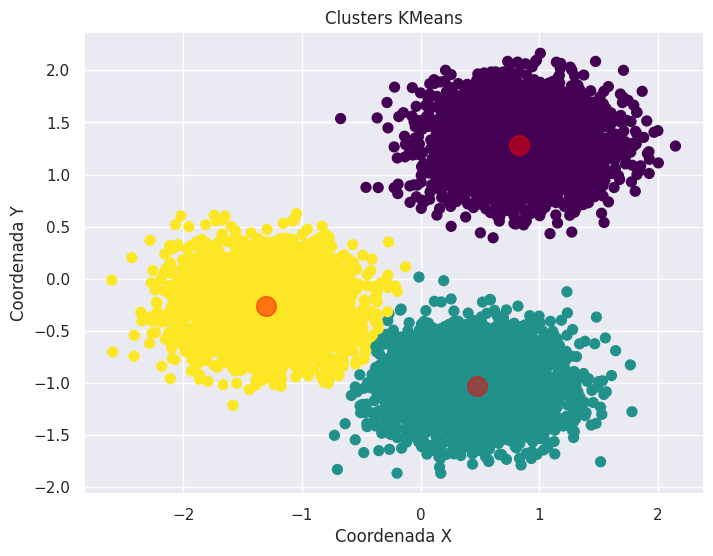

Semilla obtenida: 417765029


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


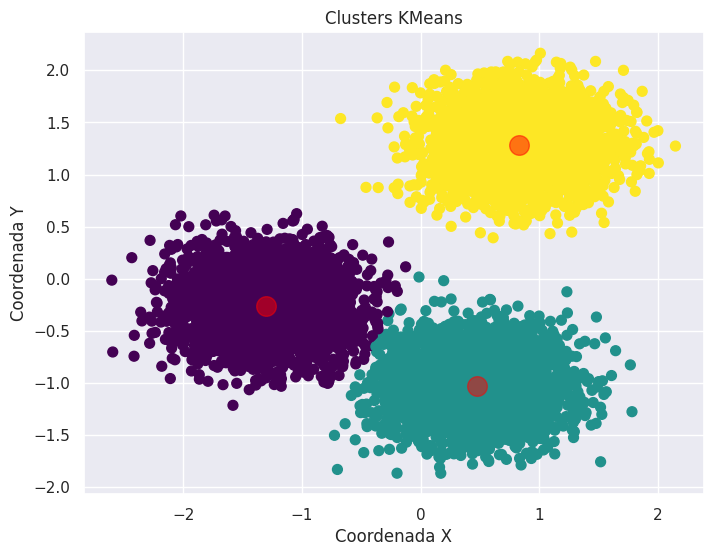

Semilla obtenida: 3856992420


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


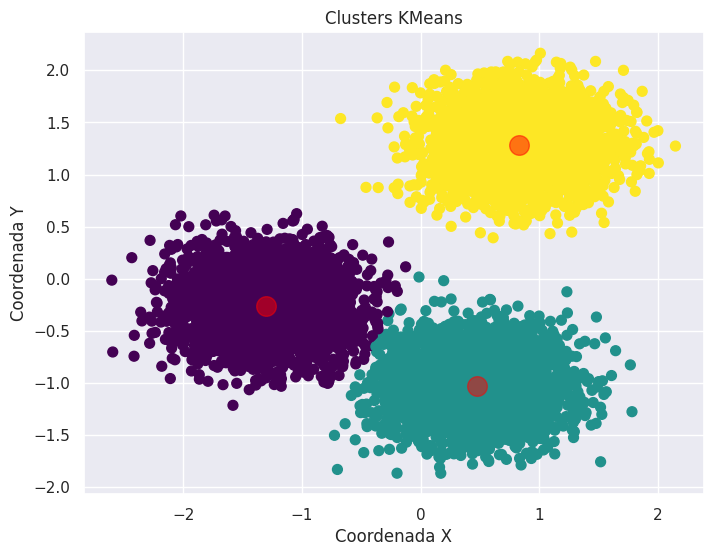

Semilla obtenida: 1932758526


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


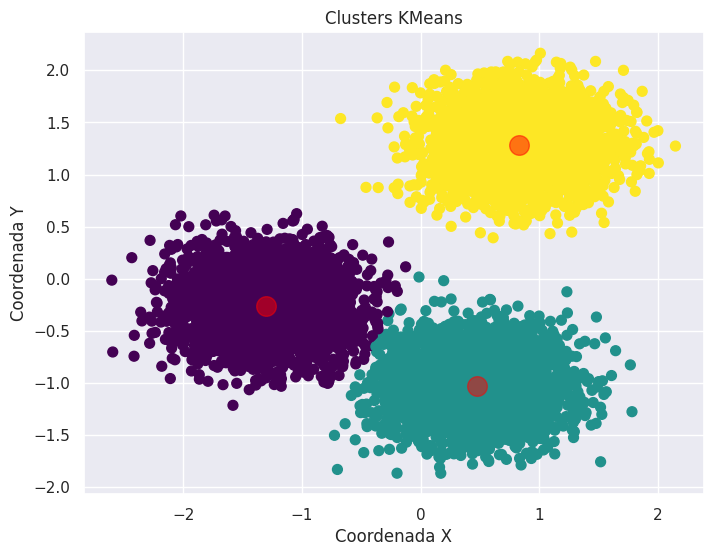

Semilla obtenida: 2685749530


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


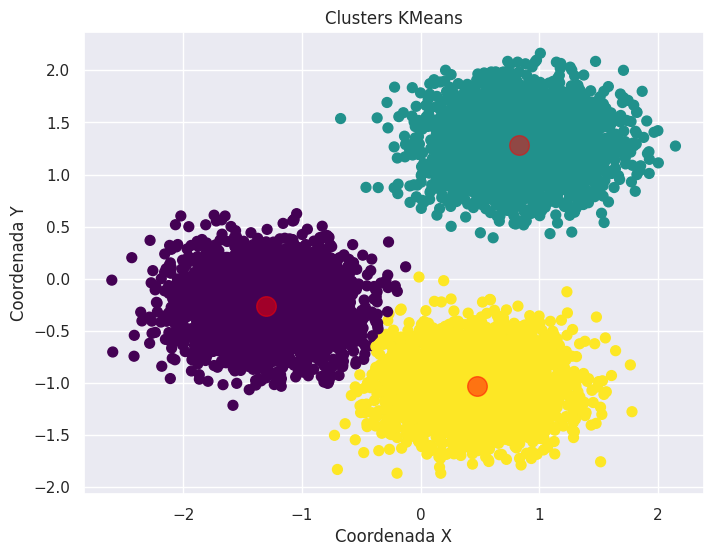

In [ ]:
for i in range(5):
  seed = random_number()
  print("Semilla obtenida:", seed)

  # Ejecuto el algoritmo KMeans
  centroides_finales, labels = correr_kmeans(seed)

  # Plotea los clusters obtenidos
  plot_clusters(centroides_finales, labels)
  plt.show()

En las distintas ejecuciones del algoritmo, podemos observar como en la mayoria de los casos, dado k=3 y 100 iteraciones, el mismo clasifica correctamente los clusters.

De todas formas, en un caso particular, el gráfico número 3 con semilla numero 2852462576 (utilizar para reproducibilidad), se logra apreciar como los centroides iniciales aleatorios parecen haber afectado la posición final de los centroides finales en los clusters.

#Ejercicio 5

Un uso común de los satélites es la captura de imágenes, como se expone
en el trabajo “Performance Modelling of Imaging Service of Earth
Observation Satellites with Two-dimensional Markov Chain” de Wen Chen,
Stephen Mackin, y Phil Palmer.

Utilizando el generador del ejercicio 1, y los datasets provistos junto a este
enunciado, se pide:

* Reproducir la generación de localizaciones de imágenes al azar,
mostrada en la figura 5: “Distribution of targets over the globe” de la
sección 4. Resultados. En este caso las imágenes se generan de
forma uniformemente distribuida dentro de los parámetros de
latitud y longitud [−60◦,60◦] [−150◦, 150◦] , respectivamente.

* Modificar el método para sólo generar localizaciones de imágenes
dentro del continente australiano (figuras 22 y 23 del dataset). De
aplicar, en función del método elegido, calcular el factor de rendimiento de forma empírica.

Para resolver este ejercicio utilizaremos la libreria geopandas para poder trabajar con el dataset otorgado. A continuacion procedemos a instalar dicha libreria.

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.7 MB/s eta 0:00:00


In [ ]:
# Realizamos los imports necesarios para resolver esta seccion.
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# Cargamos los archivos del dataset provistos
uploaded = files.upload()

In [ ]:
uploaded = files.upload()

In [ ]:
# Leemos el archivo y lo cargamos en un dataset para poder trabajar con el.
df = gpd.read_file('WB_Coastlines_10m.shp')
df

## Punto A


In [ ]:
# Graficamos el  dataset para observar su contenido. Vemos que se trata de el mapa de la tierra.
df.plot(color="crimson",linewidth= 1, figsize = (15,15))

In [ ]:
# Límites de latitud y longitud pedidos en este ejercicio
lat_min, lat_max = -60, 60
lon_min, lon_max = -150, 150

In [ ]:
# Número de puntos a generar
n_points = 1000

latitudes= []
longitudes = []

# Generamos una cierta cantidad de puntos pseudoaleatorios con nuestro generador y acotandolo al rango establecido
for i in range(0,n_points):
  latitudes.append( generador_01() * (lat_max-lat_min) + lat_min)
  longitudes.append( generador_01() * (lon_max-lon_min) + lon_min)



In [ ]:
points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes, latitudes))

In [ ]:
# Graficamos los puntos y los límites geográficos
ax = df.plot(color="black",linewidth= 1, figsize = (15,15))
ax.set_facecolor('lavender')
points.plot(ax=ax, markersize=5, color='red')
plt.show()

##Punto B


Para resolver este ejercicio generaremos puntos uniformemente distribuidos entre los parametros de latitud y longitud  [-40,-10] , [110,155] , respectivamente.


In [ ]:
df.loc[22:23,"geometry"].plot(color="orange",linewidth= 1, figsize = (15,15))

In [ ]:
# Límites de latitud y longitud
aust_lat_min, aust_lat_max = -40, -10
aust_lon_min, aust_lon_max = 110, 155

In [ ]:
# Número de puntos a generar
n_points = 1000

latitudes_australia = []
longitudes_australia = []

for i in range(0,n_points):
  latitudes_australia.append( generador_01() * (aust_lat_max-aust_lat_min) + aust_lat_min)
  longitudes_australia.append( generador_01() * (aust_lon_max-aust_lon_min) + aust_lon_min)

In [ ]:
from shapely import wkt
from shapely.geometry import Point, Polygon

In [ ]:
coordenadas = list(df.loc[22,"geometry"].coords) + list(df.loc[23,"geometry"].coords)
australia = Polygon(coordenadas)
x,y = australia.exterior.xy

In [ ]:

latitudes_validas=[]
longitudes_validas=[]

for i in range(0,n_points):
  if australia.contains(Point((longitudes_australia[i],latitudes_australia[i]))):
    latitudes_validas.append(latitudes_australia[i])
    longitudes_validas.append(longitudes_australia[i])


In [ ]:
australian_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes_validas, latitudes_validas))

In [ ]:
# Graficar los puntos y los límites geográficos
ax = df.loc[22:23,"geometry"].plot(color="orange",linewidth= 1, figsize = (10,10))
australian_points.plot(ax=ax, markersize=5, color='red')
plt.show()

In [ ]:
# Factor de rendimiento:

factor_rendimiento = len(longitudes_validas) / n_points

factor_rendimiento